# Text Classification with TF-IDF
This notebook trains a machine learning model to classify text into categories using TF-IDF features.


## **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')
!pip install kaggle --quiet


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rt4rtr","key":"3e810d07b9a32a0acc0a46193bebf736"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d shanegerami/ai-vs-human-text


!unzip -q ai-vs-human-text.zip -d ai_human_data


Dataset URL: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text
License(s): other
 90% 316M/350M [00:03<00:00, 61.5MB/s]
100% 350M/350M [00:03<00:00, 94.2MB/s]


In [5]:
data=pd.read_csv("/content/ai_human_data/AI_Human.csv")

In [6]:
data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [7]:
data.tail()

,text,generated
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0
487234,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0.0


In [8]:
data.isnull().sum()

,0
text,0
generated,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.columns

Index(['text', 'generated'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [12]:
data.shape

(487235, 2)

In [13]:
data['generated'].dtype

dtype('float64')

In [14]:
data['text'].dtype

dtype('O')

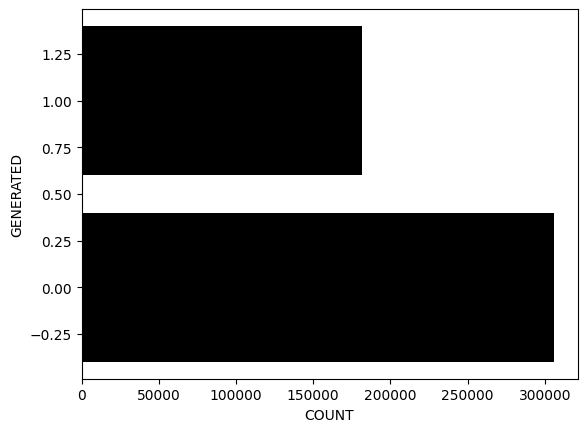

In [15]:
plt.barh(data['generated'].unique(),data['generated'].value_counts(),color='black')
plt.xlabel('COUNT')
plt.ylabel("GENERATED")
plt.show()

In [16]:
class_0 = data[data['generated'] == 0.0]
class_1 = data[data['generated'] == 1.0]

In [17]:
class_0_sampled = class_0.sample(n=len(class_1), random_state=42)

In [18]:
data=pd.concat([class_0_sampled, class_1]).sample(frac=1, random_state=42)

In [19]:
data['generated'].value_counts()

,count
generated,
0.0,181438
1.0,181438


In [20]:
data.columns

Index(['text', 'generated'], dtype='object')

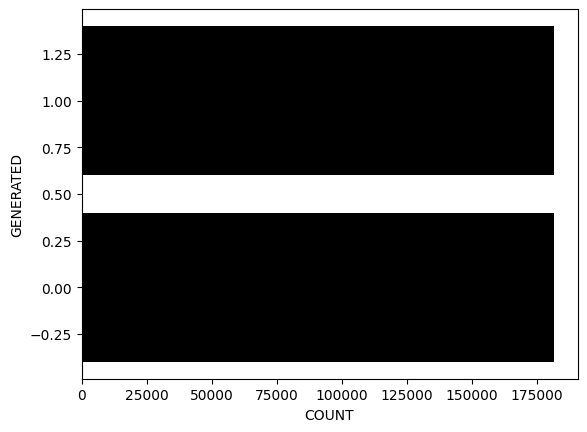

In [21]:
plt.barh(data['generated'].unique(),data['generated'].value_counts(),color='black')
plt.xlabel('COUNT')
plt.ylabel("GENERATED")
plt.show()

In [22]:
data.head()

,text,generated
211,I have been burdened with the fact that our na...,0.0
267070,"It is a tough position, but I would have to si...",0.0
193673,"Dear Senator,\n\nI am writing to you today to ...",1.0
470497,"The"" "" seems to be a very aggravating phrase f...",0.0
148863,"Okay, here's my attempt at writing an essay as...",1.0


In [23]:
data.tail()

,text,generated
91860,"Seagoing Cowboys\n\nImagine being on a boat, o...",0.0
196949,Title: The Advantages of Limiting Car Usage: A...,1.0
415821,This article is about the patent of Venus that...,0.0
65380,"To whom it may concern,\n\nIn my own opinion I...",0.0
391747,There are many bad reasons why you shouldn't g...,0.0


In [24]:
data['generated']=data['generated'].astype(int)

In [25]:
data.head()

,text,generated
211,I have been burdened with the fact that our na...,0
267070,"It is a tough position, but I would have to si...",0
193673,"Dear Senator,\n\nI am writing to you today to ...",1
470497,"The"" "" seems to be a very aggravating phrase f...",0
148863,"Okay, here's my attempt at writing an essay as...",1


In [26]:
data['generated'].value_counts()


,count
generated,
0,181438
1,181438


In [27]:
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from nltk.stem import PorterStemmer
port=PorterStemmer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
def text_reprocessing(text):
  text=text.lower()
  text=re.sub(r'\d+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=re.sub(r'\S+@\S+','',text)
  text=re.sub(r'#\w+','',text)
  text=re.sub(r'\s+',' ',text).strip( )
  text=word_tokenize(text)
  text=[word for word in text if word not in stop_words]
  text=[port.stem(word) for word in text]
  return " ".join(text)

In [29]:
!pip install swifter

import swifter



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=6c0b8cf1e7a1b833b51dffb5663d3a9ade3ca70fdc632f320b2eeea01c76f0ef
  Stored in directory: /root/.cache/pip/wheels/d9/31/ff/ff51141a088571a9f672449e5aad5ea8bb35ca5d95ba135f30
Successfully built swifter


In [30]:
data['text'] = data['text'].swifter.apply(text_reprocessing)


Pandas Apply:   0%|          | 0/362876 [00:00<?, ?it/s]

In [31]:
data['text']

,text
211,burden fact nation presid decid us rather slat...
267070,tough posit would side first main problem almo...
193673,dear senat write today express strong support ...
470497,seem aggrav phrase entir popul peopl becom dep...
148863,okay here attempt write essay th grade student...
...,...
91860,seago cowboy imagin boat way help peopl ano an...
196949,titl advantag limit car usag global perspect a...
415821,articl patent venu sometim call even star seco...
65380,may concern opinion think keep elector colleg ...


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(max_features=5000,ngram_range=(1,2))


In [33]:
X=data['text']
y=data['generated']

In [34]:

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train
X_train=vector.fit_transform(X_train)
X_test=vector.transform(X_test)
X_train


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37372735 stored elements and shape (290300, 5000)>

In [35]:
from sklearn.linear_model import LogisticRegression
model_lg=LogisticRegression()
model_lg.fit(X_train,y_train)
predict_unsen=model_lg.predict(X_test)
acc_unseen=accuracy_score(y_test,predict_unsen)
class_report_unseen=classification_report(y_test,predict_unsen)
print(f'Here is Accuracy on unseen data: {acc_unseen}')
print(f'Here is Classification report on unseen data: {class_report_unseen}')

predict_seen=model_lg.predict(X_train)
acc_seen=accuracy_score(y_train,predict_seen)
class_report_seen=classification_report(y_train,predict_seen)
print(f'Here is Accuracy on seen data: {acc_seen}')
print(f'Here is Classification report on seen data: {class_report_seen}')


Here is Accuracy on unseen data: 0.9917052469135802
Here is Classification report on unseen data:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     36098
           1       0.99      0.99      0.99     36478

    accuracy                           0.99     72576
   macro avg       0.99      0.99      0.99     72576
weighted avg       0.99      0.99      0.99     72576

Here is Accuracy on seen data: 0.9925835342748881
Here is Classification report on seen data:               precision    recall  f1-score   support

           0       0.99      0.99      0.99    145340
           1       0.99      0.99      0.99    144960

    accuracy                           0.99    290300
   macro avg       0.99      0.99      0.99    290300
weighted avg       0.99      0.99      0.99    290300



ROC AUC Score: 0.999


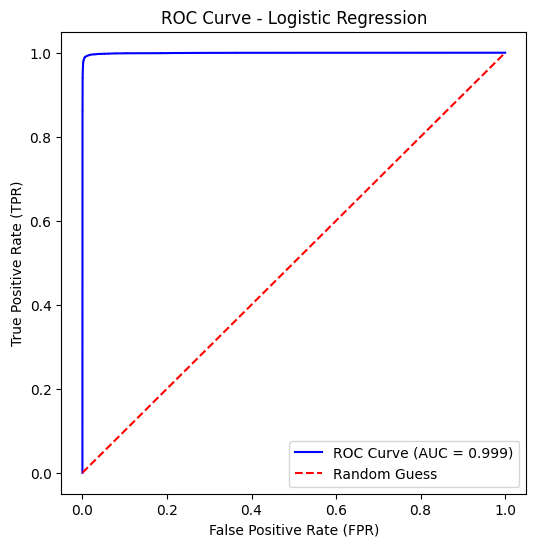

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model_lg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {auc_score:.3f}")


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


In [40]:
import joblib

In [41]:
save=joblib.dump(model_lg,'model_lg.joblib')

In [47]:
from google.colab import files
files.download('model_lg.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>